# Ejemplo 2. Diseño de Filtro Pasa-Bandas por Medio del Pasa_Bajos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

In [2]:
M = 101
fs = 1e4

In [3]:
fc = 3e3
wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes
n = np.arange(-M//2+1, M//2+1) # Vector de muestras
hi1 = wc/np.pi * np.sinc(wc*n/np.pi) # Respuesta del filtro ideal pasa-bajos
win = np.ones(M)
h_n = hi1*win # Multiplico la respuesta ideal por la ventana
w, h = sp.freqz(h_n, 1, whole=True)

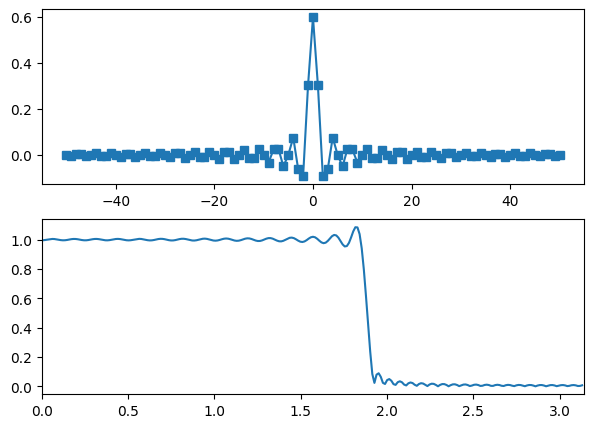

In [4]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(n, h_n, marker='s')

plt.subplot(212)
plt.plot(w-np.pi, np.abs(np.fft.fftshift(h)))
plt.xlim([0, np.pi])
plt.show()

Para este caso hay que diseñar un segundo filtro pasa-bajos con una fc diferente al del primero para poder generar la banda de paso del filtro.

In [5]:
fc = 1e3
wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes
n = np.arange(-M//2+1, M//2+1) # Vector de muestras
hi2 = wc/np.pi * np.sinc(wc*n/np.pi) # Respuesta del filtro ideal pasa-bajos

In [6]:
delta = np.zeros(M) # Vector de ceros de tamaño M que coindice con el tamaño de h
delta[M//2] = 1 # Se pone un 1 en la pos [0] para formar la función delta
h_high_i2 = delta - hi2 # Filtro pasa-altos
win = np.ones(M)
h_n = h_high_i2*win # Multiplico la respuesta ideal por la ventana
w, h = sp.freqz(h_n, 1, whole=True)

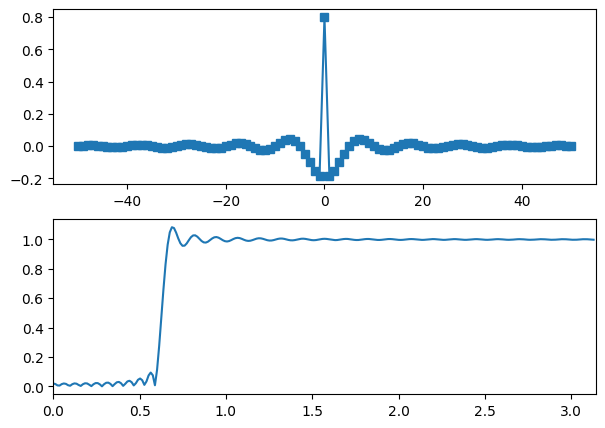

In [7]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(n, h_n, marker='s')

plt.subplot(212)
plt.plot(w-np.pi, np.abs(np.fft.fftshift(h)))
plt.xlim([0, np.pi])
plt.show()

Se aplica la convolución entre ambos filtros para obtener el pasa-bandas

In [8]:
h_band_pass = np.convolve(hi1, h_high_i2, mode='same')
w, h = sp.freqz(h_band_pass, 1, whole=True)

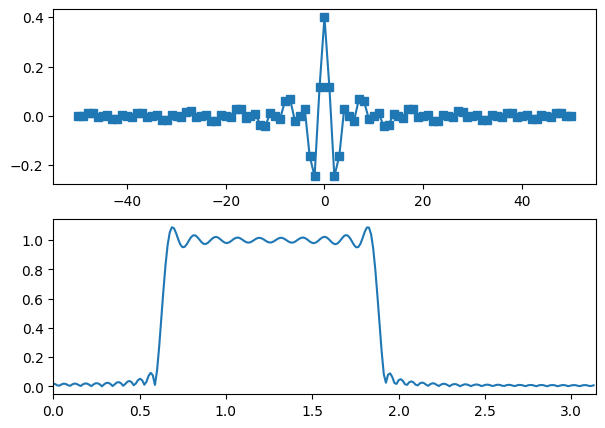

In [9]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(n, h_band_pass, marker='s')

plt.subplot(212)
plt.plot(w-np.pi, np.abs(np.fft.fftshift(h)))
plt.xlim([0, np.pi])
plt.show()

Se logró crear un filtro pasa-bandas por medio de filtros pasa-bajos usando el metodo de inversión espectral para crear el pasa-altos y un truco con las frecuencias de corte para finalmente obtener el pasa-bandas